In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import nltk


In [2]:
label_positive = 1 
label_netral = 0
label_negative = -1

In [3]:
df = pd.read_csv(r'PreProcessing.csv')
df.head()

Unnamed: 0                                           Komentar    Label  \
0           0  lha kekerasan seksual itu kan mmg definisinya ...  positif   
1           1  jangan mendekati zina itu adalah aturan yang p...  negatif   
2           2  the law is an art semakin rinci semakin mudah ...  positif   
3           3  tetapkan dulu apa yang dimaksud dengan kekeras...   netral   
4           4        lbih cock diterapkan dikemendikbud dan dpr    netral   

                                        TOKENIZATION  \
0  ['lha', 'kekerasan', 'seksual', 'itu', 'kan', ...   
1  ['jngan', 'mendekati', 'zinah', 'itu', 'adalah...   
2  ['the', 'law', 'is', 'an', 'art', 'semakin', '...   
3  ['tetapkan', 'dulu', 'aoa', 'yg', 'dimaksud', ...   
4  ['lbih', 'cock', 'diterapkan', 'dikemendikbud'...   

                                        STOP_REMOVAL  \
0  ['lha', 'kekerasan', 'seksual', 'mmg', 'defini...   
1  ['jngan', 'mendekati', 'zinah', 'aturan', 'dn'...   
2  ['the', 'law', 'is', 'art', 'rinci', 'gampang'...   
3    ['tetapkan', 'aoa', 'kekerasan', 'seksualitas']   
4  ['lbih', 'cock', 'diterapkan', 'dikemendikbud'...   

                                             STEMMER  \
0  ['lha', 'keras', 'seksual', 'mmg', 'definisi',...   
1  ['jngan', 'dekat', 'zinah', 'atur', 'dn', 'nda...   
2  ['the', 'law', 'is', 'art', 'rinci', 'gampang'...   
3           ['tetap', 'aoa', 'keras', 'seksualitas']   
4  ['lbih', 'cock', 'terap', 'dikemendikbud', 'dn...   

                                      Komentar_Final  
0  lha keras seksual mmg definisi hrs tuju korban...  
1  jngan dekat zinah atur dn ndak pasal uu dll de...  
2                 the law is art rinci gampang belok  
3                        tetap aoa keras seksualitas  
4               lbih cock terap dikemendikbud dn dpr

In [4]:
df = df.drop(df.columns[[0, 4]], axis=1)
df.head()

Komentar    Label  \
0  lha kekerasan seksual itu kan mmg definisinya ...  positif   
1  jangan mendekati zina itu adalah aturan yang p...  negatif   
2  the law is an art semakin rinci semakin mudah ...  positif   
3  tetapkan dulu apa yang dimaksud dengan kekeras...   netral   
4        lbih cock diterapkan dikemendikbud dan dpr    netral   

                                        TOKENIZATION  \
0  ['lha', 'kekerasan', 'seksual', 'itu', 'kan', ...   
1  ['jngan', 'mendekati', 'zinah', 'itu', 'adalah...   
2  ['the', 'law', 'is', 'an', 'art', 'semakin', '...   
3  ['tetapkan', 'dulu', 'aoa', 'yg', 'dimaksud', ...   
4  ['lbih', 'cock', 'diterapkan', 'dikemendikbud'...   

                                             STEMMER  \
0  ['lha', 'keras', 'seksual', 'mmg', 'definisi',...   
1  ['jngan', 'dekat', 'zinah', 'atur', 'dn', 'nda...   
2  ['the', 'law', 'is', 'art', 'rinci', 'gampang'...   
3           ['tetap', 'aoa', 'keras', 'seksualitas']   
4  ['lbih', 'cock', 'terap', 'dikemendikbud', 'dn...   

                                      Komentar_Final  
0  lha keras seksual mmg definisi hrs tuju korban...  
1  jngan dekat zinah atur dn ndak pasal uu dll de...  
2                 the law is art rinci gampang belok  
3                        tetap aoa keras seksualitas  
4               lbih cock terap dikemendikbud dn dpr

In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Komentar_Final'], df['Label'], test_size = 0.2,random_state = 20)
# random_state = 20 menyatakan kita akan mendapatkan output yang sama dengan saat pertama kali membuat pemisahan.

In [6]:
df_train = pd.DataFrame()
df_train['Sentiment'] = train_X
df_train['Label'] = train_Y

df_test = pd.DataFrame()
df_test['Sentiment'] = test_X
df_test['Label'] = test_Y

In [7]:
def convert(label):
  if label == 'positif':
    return 1
  elif label == 'netral':
    return 0
  else:
    return -1

df_train['Label'] = train_Y.apply(convert)
df_test['Label'] = test_Y.apply(convert)

In [8]:
# TF-IDF
tfidf_vect = TfidfVectorizer(max_features = 5000)
# tfidf_vect.fit(df_train['Sentiment'])
tfidf_vect.fit(df['Komentar_Final'])


TfidfVectorizer(max_features=5000)

In [9]:
tfidf_vect

TfidfVectorizer(max_features=5000)

In [10]:
print()
print("selected words as feature : ")
print("----------------------------")
print(tfidf_vect.get_feature_names())
print()


selected words as feature : 
----------------------------
['aamiin', 'abai', 'aborsi', 'ada', 'adh', 'adil', 'adl', 'adu', 'aduh', 'advokasi', 'adzab', 'agama', 'agamais', 'ahahaaha', 'ahirnya', 'ahklak', 'ahli', 'aj', 'ajar', 'aju', 'akai', 'akal', 'akar', 'akhirat', 'akhsan', 'akibat', 'aksi', 'alaikum', 'alami', 'alat', 'aldo', 'alesanya', 'alhamdulilah', 'alias', 'alih', 'allah', 'alluxes', 'ama', 'amal', 'aman', 'amat', 'ambigu', 'ambil', 'amburadul', 'anak', 'ancam', 'ancur', 'anda', 'andarwati', 'andi', 'ane', 'anehny', 'anggap', 'anggar', 'anggauta', 'anggota', 'anjur', 'ank', 'anu', 'aoa', 'apa', 'apadaya', 'api', 'apologize', 'apps', 'aq', 'arab', 'arah', 'argumen', 'argumentum', 'art', 'asatgfiruloh', 'asnawi', 'assalamualaikum', 'at', 'atas', 'atau', 'ato', 'atur', 'aturanny', 'aufa', 'awi', 'ayam', 'ayat', 'ayo', 'azab', 'azas', 'babad', 'baca', 'bacod', 'bacot', 'badan', 'bae', 'bagai', 'bagus', 'bahas', 'bahasa', 'baik', 'baju', 'bales', 'banding', 'bang', 'bank', 'bant

C:\Users\ASUS\.conda\envs\aslan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect.vocabulary_)

{'lha': 668, 'keras': 565, 'seksual': 1100, 'mmg': 771, 'definisi': 254, 'hrs': 431, 'tuju': 1278, 'korban': 607, 'mana': 713, 'logika': 683, 'nolak': 879, 'gimana': 374, 'lawan': 650, 'klw': 583, 'ndak': 837, 'aoa': 59, 'jngan': 509, 'dekat': 257, 'zinah': 1349, 'atur': 78, 'dn': 298, 'pasal': 929, 'uu': 1319, 'dll': 291, 'demokrasi': 259, 'tdak': 1213, 'layak': 651, 'untk': 1307, 'isi': 469, 'penting': 949, 'petinggi': 971, 'maslahat': 725, 'masyarakat': 726, 'aq': 65, 'bsa': 182, 'jadi': 484, 'tameng': 1202, 'oknum': 901, 'media': 732, 'skrang': 1145, 'byk': 198, 'ngomong': 865, 'ngawur': 852, 'the': 1239, 'law': 649, 'is': 468, 'art': 70, 'rinci': 1056, 'gampang': 355, 'belok': 125, 'tetap': 1235, 'seksualitas': 1101, 'lbih': 653, 'cock': 228, 'terap': 1227, 'dikemendikbud': 279, 'dpr': 304, 'pakai': 918, 'anak': 44, 'sekolah': 1098, 'mahasiswa': 699, 'rok': 1063, 'lutut': 691, 'ganti': 356, 'tri': 1260, 'bubar': 185, 'jga': 501, 'ragu': 1028, 'lapor': 643, 'usul': 1316, 'lindung':

In [12]:
print("jumlah data training : ")
print(len(train_X))
print()

print("jumlah data test : ") 
print(len(test_X))
print() 

jumlah data training : 
516

jumlah data test : 
130



In [13]:
train_X_tfidf = tfidf_vect.transform(df_train['Sentiment'])
test_X_tfidf = tfidf_vect.transform(df_test['Sentiment'])

In [14]:
# tfidf_mat = tfidf_vect.transform(df['Komentar_Final']).toarray()
tfidf_mat = tfidf_vect.transform(df_train['Sentiment']).toarray()
# tfidf_mat = tfidf_vect.transform(df_test['Sentiment']).toarray()

terms = tfidf_vect.get_feature_names()

# menjumlahkan tfidf dari tiap kata/term di semua dataset
sums = tfidf_mat.sum(axis=0)

# menampilkan jumlah tfidf dari tiap kata yang ada di dataset
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','TF-IDF'])


In [15]:
ranking_br=ranking.sort_values('TF-IDF', ascending=False)
print(ranking_br)

           term     TF-IDF
1278       tuju  21.436699
298          dn  18.245116
78         atur  16.888497
607      korban  16.066148
565       keras  15.549929
...         ...        ...
379        giur   0.000000
810      munkin   0.000000
1258  transaksi   0.000000
150       binar   0.000000
30         aldo   0.000000

[1350 rows x 2 columns]


In [16]:
ranking_br.to_csv(r'tfidf_traintiga.csv')

In [17]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(train_X_tfidf,df_train['Label'])

MultinomialNB()

In [18]:
predict = model.predict(test_X_tfidf)
acc = (accuracy_score(df_test['Label'],predict))*100

print(round(acc,2),'%')

85.38 %


In [19]:
conf_matrix = confusion_matrix(df_test['Label'], predict)
print("Confusion Matrix : ") 
print(conf_matrix)

Confusion Matrix : 
[[12 10  3]
 [ 0 64  1]
 [ 0  5 35]]


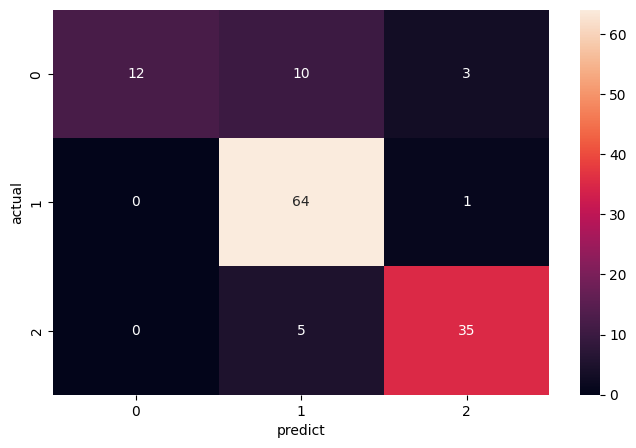

In [20]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(df_test['Label'], predict), annot=True, fmt=".0f",ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.savefig(r"confusion matrix.png")
plt.show()

In [21]:
from sklearn.metrics import classification_report
# Accuracy, Precision, Recall, f1-score
print ("\nHere is the classification report:") 
print (classification_report(df_test['Label'], predict))


Here is the classification report:
              precision    recall  f1-score   support

          -1       1.00      0.48      0.65        25
           0       0.81      0.98      0.89        65
           1       0.90      0.88      0.89        40

    accuracy                           0.85       130
   macro avg       0.90      0.78      0.81       130
weighted avg       0.87      0.85      0.84       130



In [22]:
# menghitung jumlah label positif dan negatif pada data test setelah hasil prediksi model
test_after_nb_count_label = collections.Counter(predict)
juml_pos_nb= test_after_nb_count_label[label_positive]
juml_net_nb= test_after_nb_count_label[label_netral]
juml_neg_nb = test_after_nb_count_label[label_negative]

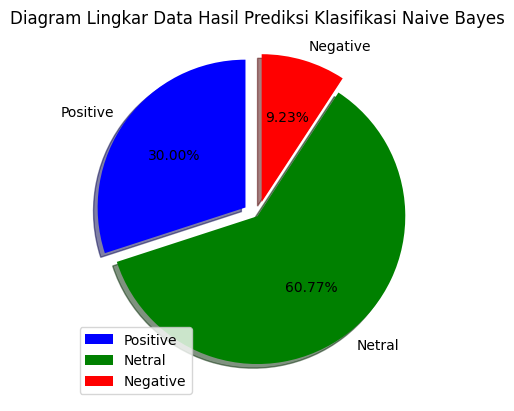

In [23]:
#pie chart analisis sentimen
labels = ['Positive','Netral','Negative']
Category = [juml_pos_nb,juml_net_nb, juml_neg_nb]
fig, ax = plt.subplots()
color = ['blue','green', 'red']
plt.pie(Category, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0.1))
plt.title('Diagram Lingkar Data Hasil Prediksi Klasifikasi Naive Bayes')
plt.legend()
plt.savefig(r"pie_nbdtiga.png")
plt.show()

In [24]:
kamus_kata = pd.read_csv(r'tfidf_traintiga.csv')
kamus_kata.head(15)

Unnamed: 0          term     TF-IDF
0         1278          tuju  21.436699
1          298            dn  18.245116
2           78          atur  16.888497
3          607        korban  16.066148
4          565         keras  15.549929
5         1174          suka  15.114227
6         1100       seksual  14.813550
7         1349         zinah  12.784503
8          963  permendikbud  12.002170
9          837          ndak  11.874753
10          59           aoa  11.698149
11         182           bsa  11.017690
12        1243        tindak  11.002777
13         636          laku  10.654796
14         929         pasal  10.034449

In [25]:
del kamus_kata['Unnamed: 0']
kamus_kata.head(15)

term     TF-IDF
0           tuju  21.436699
1             dn  18.245116
2           atur  16.888497
3         korban  16.066148
4          keras  15.549929
5           suka  15.114227
6        seksual  14.813550
7          zinah  12.784503
8   permendikbud  12.002170
9           ndak  11.874753
10           aoa  11.698149
11           bsa  11.017690
12        tindak  11.002777
13          laku  10.654796
14         pasal  10.034449

In [26]:
import pickle
pickle.dump(model,
            open('model_nbtiga.pkl', 'wb'),
            protocol=4)

In [27]:
pickle.dump(tfidf_vect,
            open('tfidf.pkl', 'wb'),
            protocol=4)